In [1]:
import pandas as pd

df = pd.DataFrame().from_dict({'X': [1,2,3,4,5], 'Y': [1,2,1.3,3.75,2.25]})
df

,X,Y
0,1,1.00
1,2,2.00
2,3,1.30
3,4,3.75
4,5,2.25


The formula for a regression line is

Y' = bX + A

Y' = b1X1 + b2X2 + b3X3 + b0    # multiple X

Let's calculate Y'

In [2]:
b = 0.5
A = 0

In [3]:
df["Y pred"] = df['X'] * b + A
df

,X,Y,Y pred
0,1,1.00,0.5
1,2,2.00,1.0
2,3,1.30,1.5
3,4,3.75,2.0
4,5,2.25,2.5


In [4]:
df["error"] = df["Y"] - df["Y pred"]
df

,X,Y,Y pred,error
0,1,1.00,0.5,0.50
1,2,2.00,1.0,1.00
2,3,1.30,1.5,-0.20
3,4,3.75,2.0,1.75
4,5,2.25,2.5,-0.25


In [5]:
df["error sq"] = df["error"] * df["error"]
df

,X,Y,Y pred,error,error sq
0,1,1.00,0.5,0.50,0.2500
1,2,2.00,1.0,1.00,1.0000
2,3,1.30,1.5,-0.20,0.0400
3,4,3.75,2.0,1.75,3.0625
4,5,2.25,2.5,-0.25,0.0625


What is the sum of error?

In [6]:
sum_of_error_sq = df["error sq"].sum()
sum_of_error_sq

4.415

In [7]:
def sum_error_eq(x,y,b,A):
    x=list(x)
    y=list(y)
    sum_error_sq = 0
    for i in range(len(x)):
        sum_error_sq += ((b*x[i]+A) -  y[i])**2
    return sum_error_sq

sum_error_eq(df["X"],df["Y"],1,0)    

10.515

## Let's visulize it

In [8]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider, Div
from bokeh.plotting import figure, output_notebook, show
from bokeh.themes import built_in_themes
from bokeh.io import curdoc

output_notebook()
curdoc().theme = 'night_sky'

b = 0.425
A = 0.785

df = pd.DataFrame().from_dict({'X': [1,2,3,4,5], 'Y': [1,2,1.3,3.75,2.25]})
df['b'] = b
df['A'] = A
df['Y pred'] = df['X'] * b + A

source = ColumnDataSource(df)

plot = figure(plot_width=400, plot_height=400, x_range=[0,6], y_range=[0,6])
plot.line(x='X', y='Y pred', source=source, line_width=3, line_alpha=0.6)
plot.circle(x='X', y='Y', source=source, size=10, color="green", alpha=0.5)

callback_b = CustomJS(args=dict(source=source), code="""
        var data = source.data;
        var b_val = cb_obj.value
        var b = data['b']
        var A = data['A']
        var x = data['X']
        var y = data['Y pred']
        for (var i = 0; i < x.length; i++) {
            b[i] = b_val
            y[i] = b[i] * x[i] + A[i]
        }
        source.change.emit();
    """)

callback_A = CustomJS(args=dict(source=source), code="""
        var data = source.data;
        var A_val = cb_obj.value
        var b = data['b']
        var A = data['A']
        var x = data['X']
        var y = data['Y pred']
        for (var i = 0; i < x.length; i++) {
            A[i] = A_val
            y[i] = b[i] * x[i] + A[i]
        }
        source.change.emit();
    """)

div = Div(text="Sum of error sq: "+ str(sum_error_eq(source.data['X'],source.data['Y'], b, A)))

change_text = CustomJS(args=dict(dev=div, source=source), code="""
                var data = source.data;
                var y_pred = data['Y pred'];
                var y = data['Y'];
                var result = 0;
                for (var i = 0; i < y.length; i++) {
                    var diff = y_pred[i] - y[i]
                    result = result + diff * diff
                }
                dev.text = "Sum of error sq: " + result;
             """       
    )

slider_b = Slider(start=0.1, end=4, value=b, step=.1, title="value of b")
slider_b.js_on_change('value', callback_b, change_text)
slider_A = Slider(start=0.1, end=4, value=A, step=.1, title="value of A")
slider_A.js_on_change('value', callback_A, change_text)

layout = column(slider_b, slider_A, plot, div)

show(layout)

Loading BokehJS ...

In [9]:
source.data

{'index': array([0, 1, 2, 3, 4]),
 'X': array([1, 2, 3, 4, 5]),
 'Y': array([1.  , 2.  , 1.3 , 3.75, 2.25]),
 'b': array([0.425, 0.425, 0.425, 0.425, 0.425]),
 'A': array([0.785, 0.785, 0.785, 0.785, 0.785]),
 'Y pred': array([1.21 , 1.635, 2.06 , 2.485, 2.91 ])}

### Finding the best line with scikit learn
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [10]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/cheuktingho/.pyenv/versions/3.7.3/envs/ds-tutorial/lib/python3.7/site-packages (0.23.1)
You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [12]:
line_reg = LinearRegression()
X = np.array(df['X']).reshape(-1, 1)
y = np.array(df['Y'])
line_reg.fit(X,y)
print("Score: ", line_reg.score(X, y),
      "\nCoef: ", line_reg.coef_,
      "\nIntercept: ", line_reg.intercept_)

Score:  0.3929192951925171 
Coef:  [0.425] 
Intercept:  0.7849999999999999


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


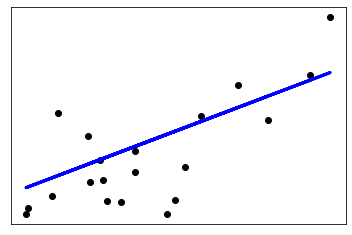

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()